# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [ ]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.4 huggingface_hub==0.34.0 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.7/558.7 kB 14.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 5.0.0 requires huggingface-hub<2.0,>=1.3.0, but you have huggingface-hub 0.34.0 which is incompatible.


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# **Loading the dataset**

In [ ]:
# Uncomment the below snippet of code if the drive needs to be mounted
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
kart = pd.read_csv("/content/drive/MyDrive/COURSE/model deployment/project/SuperKart/SuperKart.csv")

In [ ]:
# copying data to another variable to avoid any changes to original data
data = kart.copy()

# **Data Overview**

In [ ]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
data.tail()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


In [ ]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 8763 rows and 12 columns.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In [ ]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD306,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
Product_Id,0
Product_Weight,0
Product_Sugar_Content,0
Product_Allocated_Area,0
Product_Type,0
Product_MRP,0
Store_Id,0
Store_Establishment_Year,0
Store_Size,0
Store_Location_City_Type,0


# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

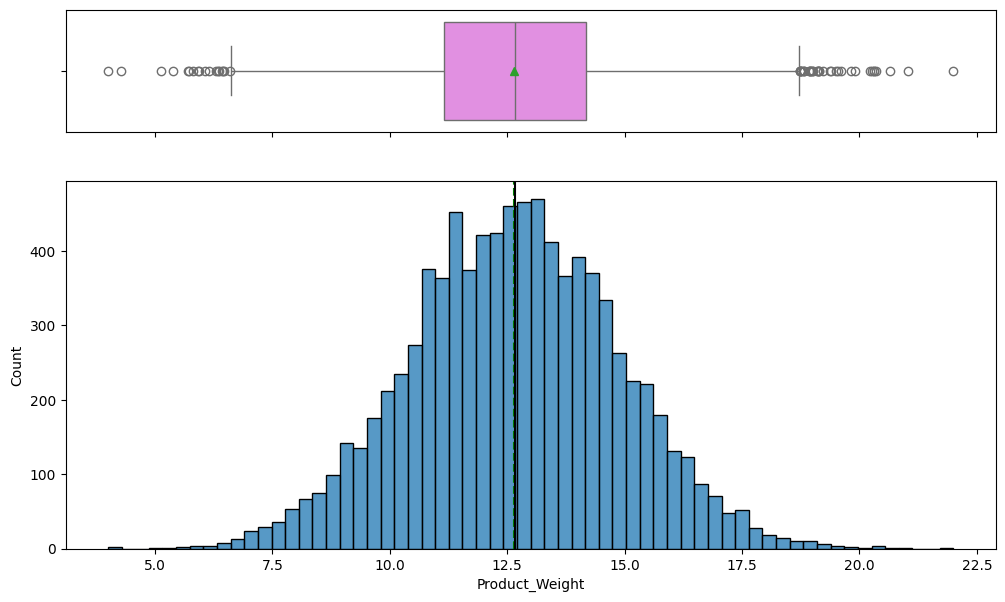

In [ ]:
histogram_boxplot(data, "Product_Weight")

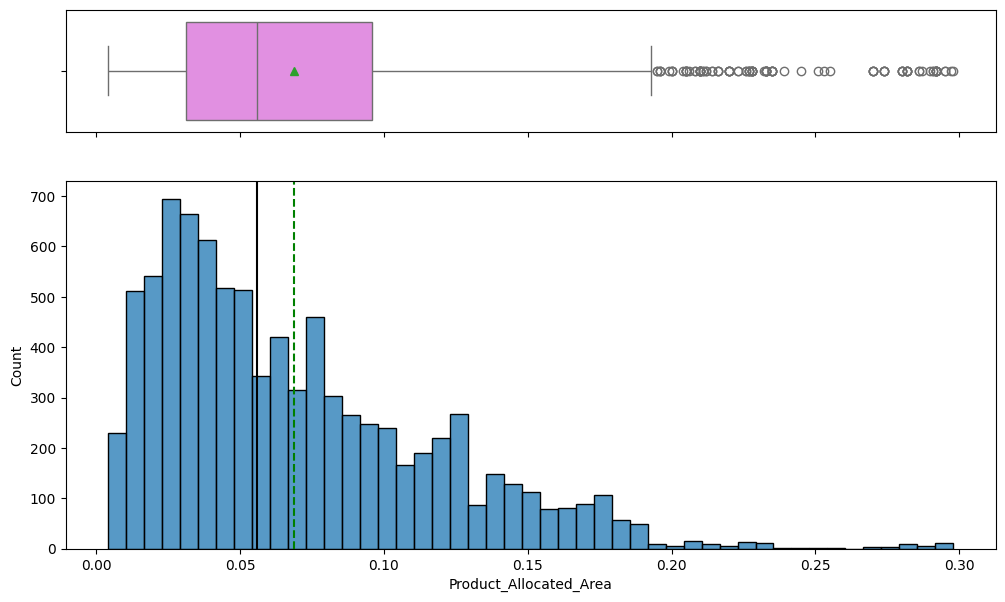

In [ ]:
histogram_boxplot(data, "Product_Allocated_Area")

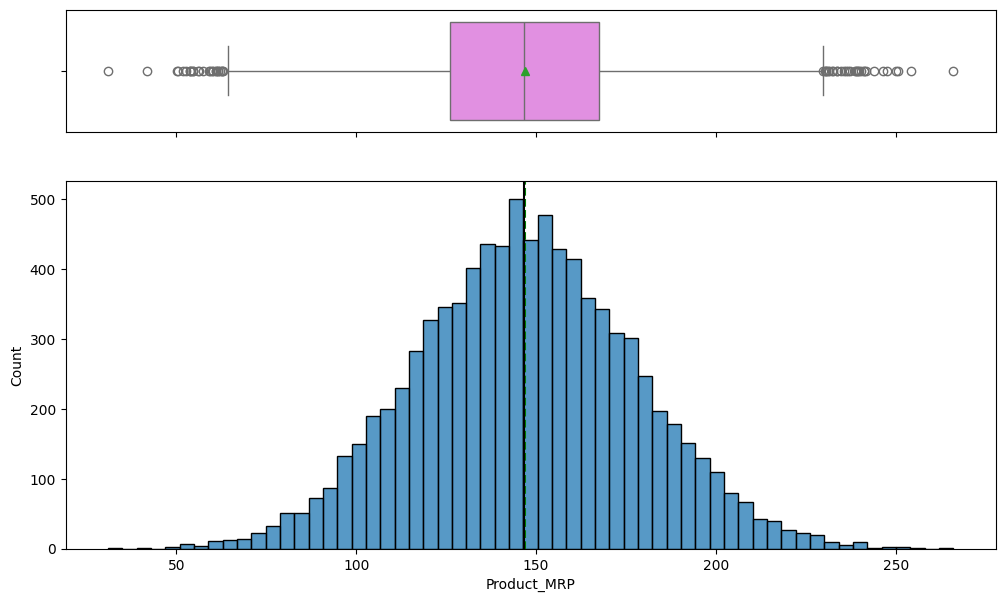

In [ ]:
histogram_boxplot(data, "Product_MRP")

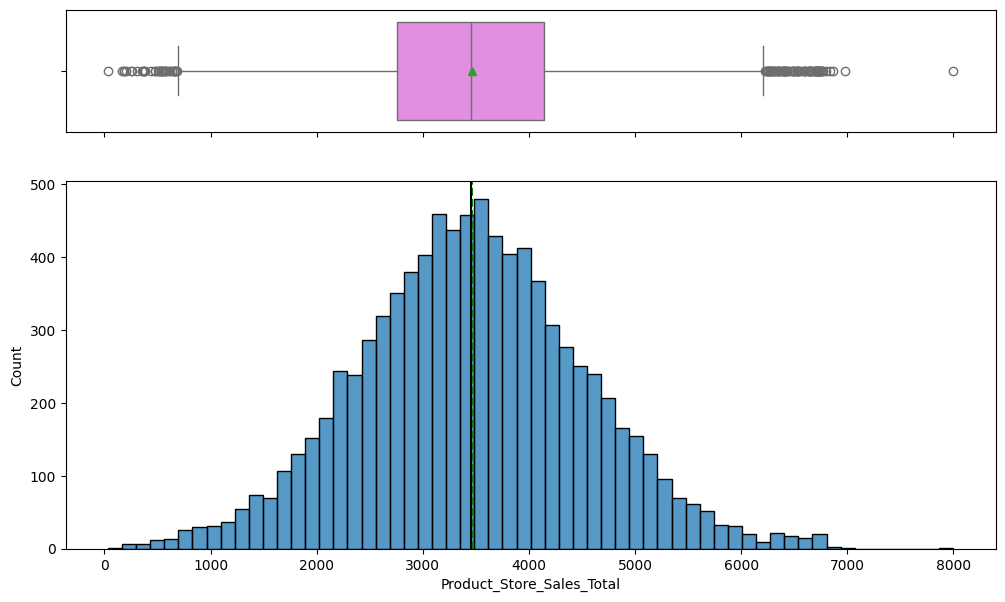

In [ ]:
histogram_boxplot(data, "Product_Store_Sales_Total")

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

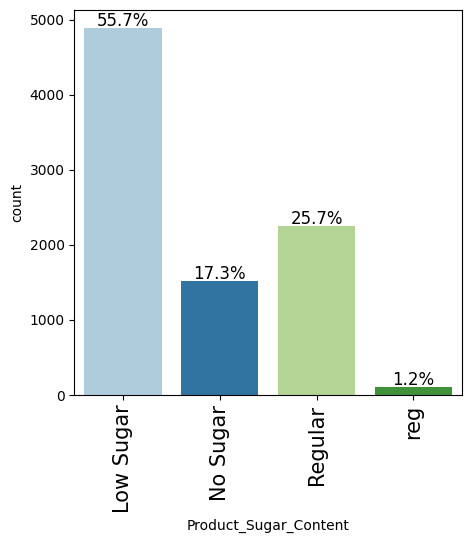

In [ ]:
labeled_barplot(data, "Product_Sugar_Content", perc=True)

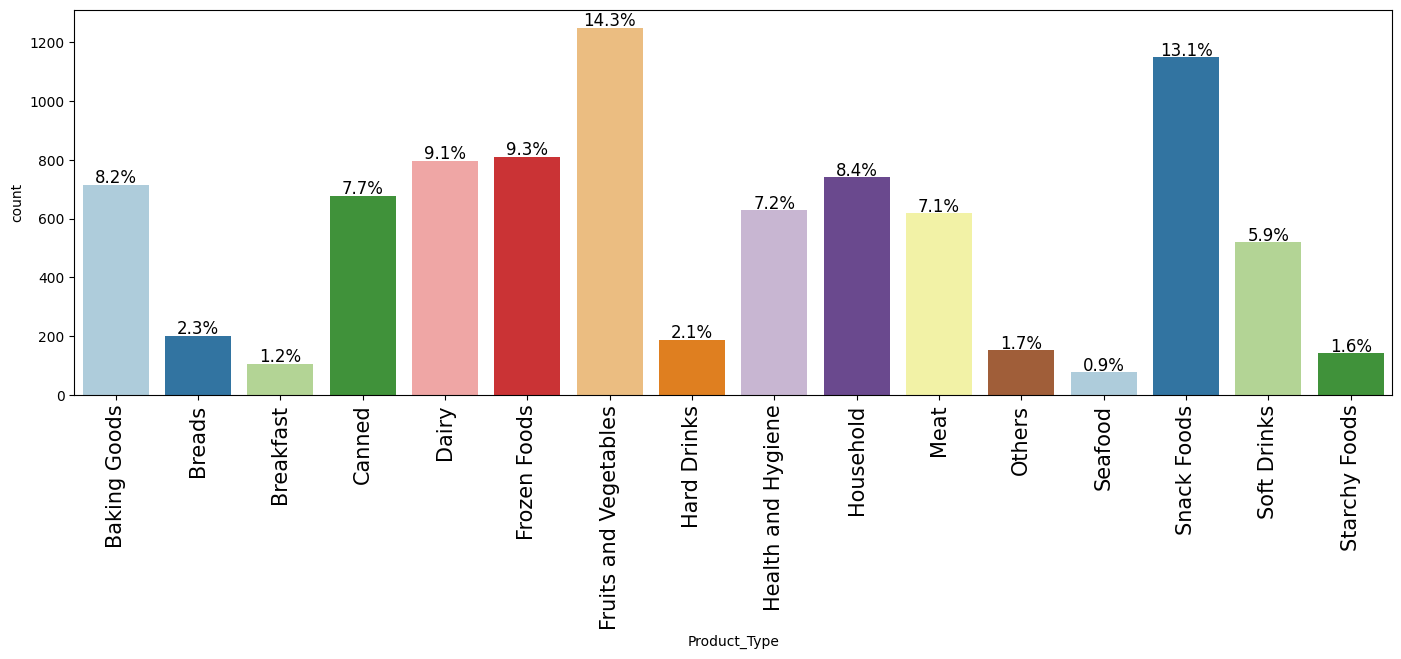

In [ ]:
labeled_barplot(data, "Product_Type", perc=True)

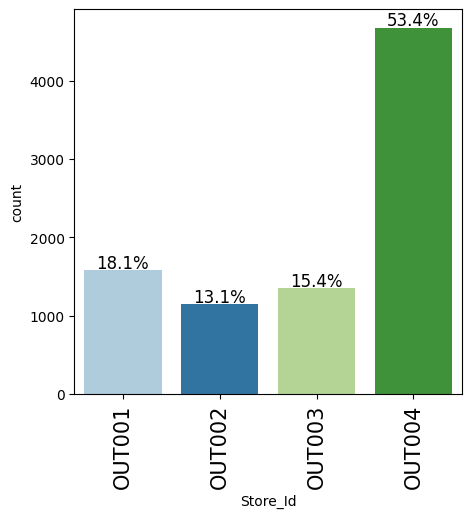

In [ ]:
labeled_barplot(data, "Store_Id", perc=True)

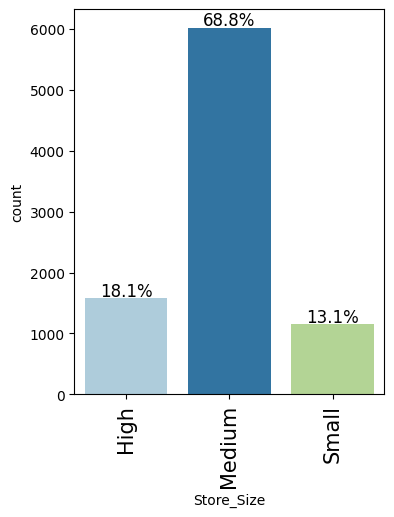

In [ ]:
labeled_barplot(data, "Store_Size", perc=True)

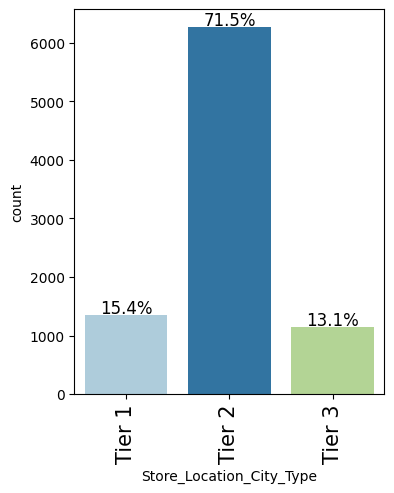

In [ ]:
labeled_barplot(data, "Store_Location_City_Type", perc=True)

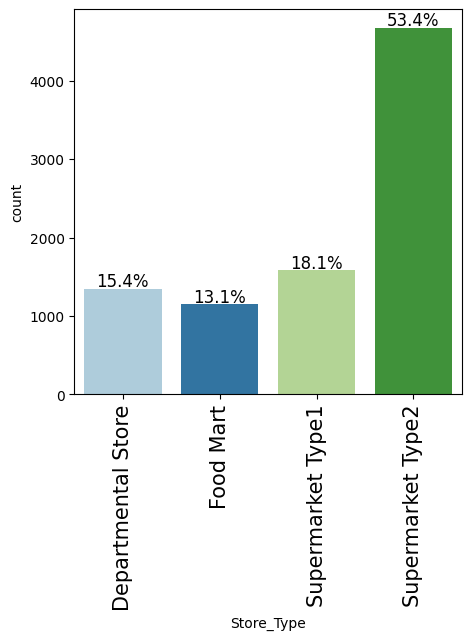

In [ ]:
labeled_barplot(data, "Store_Type", perc=True)

## Bivariate Analysis

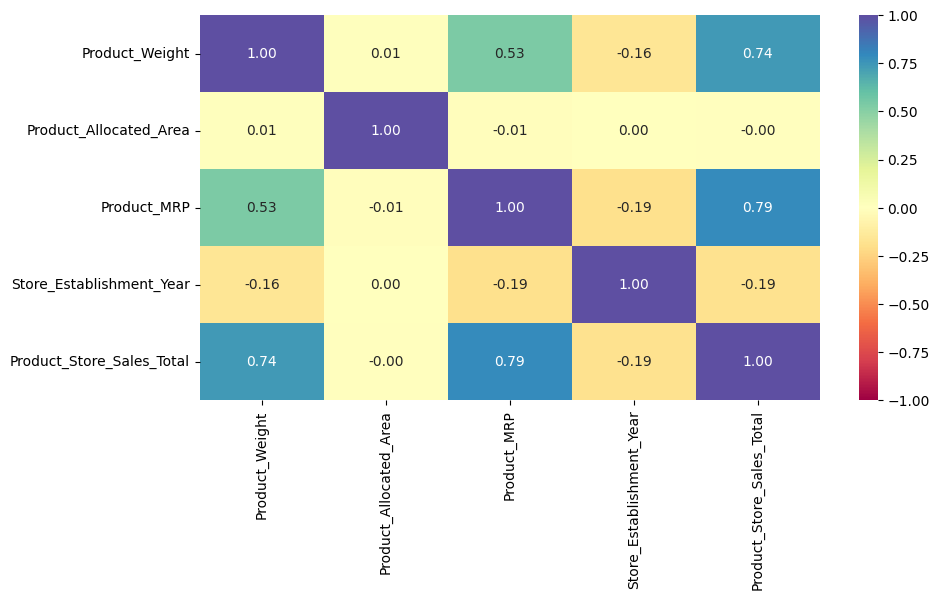

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

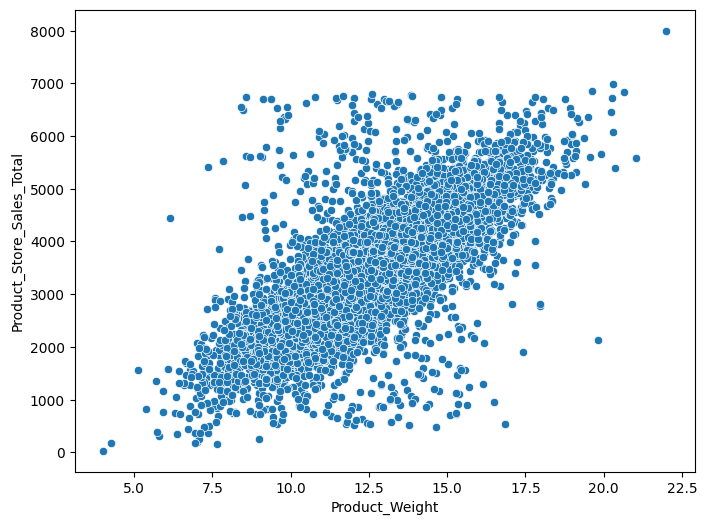

In [ ]:
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Product_Weight, y=data.Product_Store_Sales_Total)
plt.show()

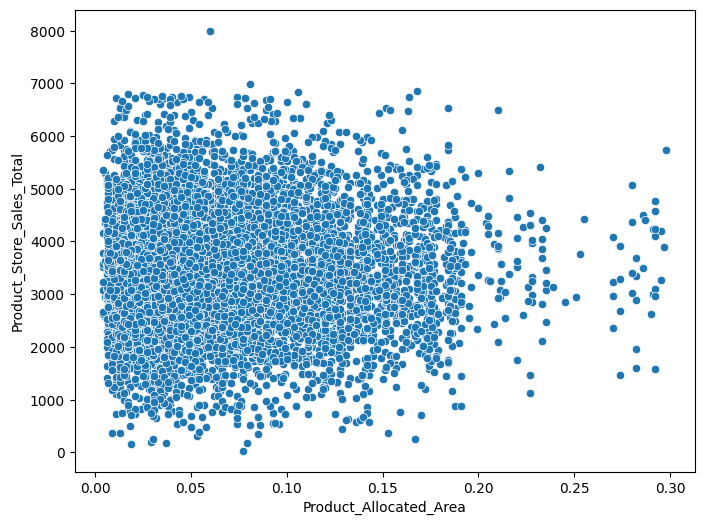

In [ ]:
plt.figure(figsize=[8, 6])
sns.scatterplot(data=data,x="Product_Allocated_Area", y="Product_Store_Sales_Total")
plt.show()

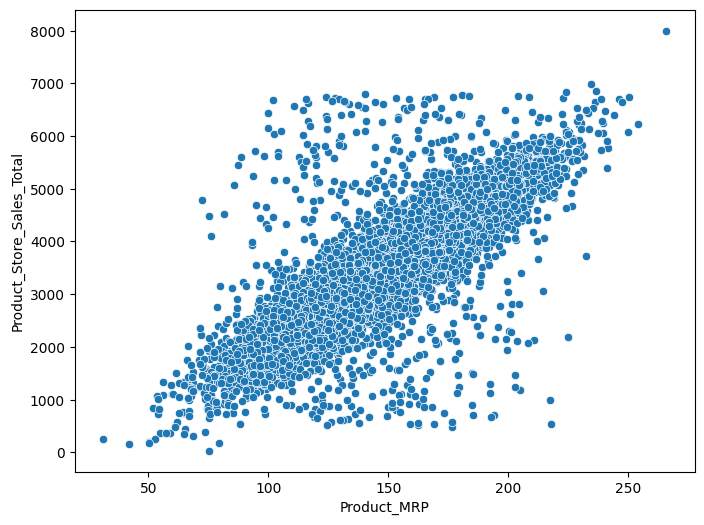

In [ ]:
plt.figure(figsize=[8, 6])
sns.scatterplot(data=data,x="Product_MRP", y="Product_Store_Sales_Total")
plt.show()

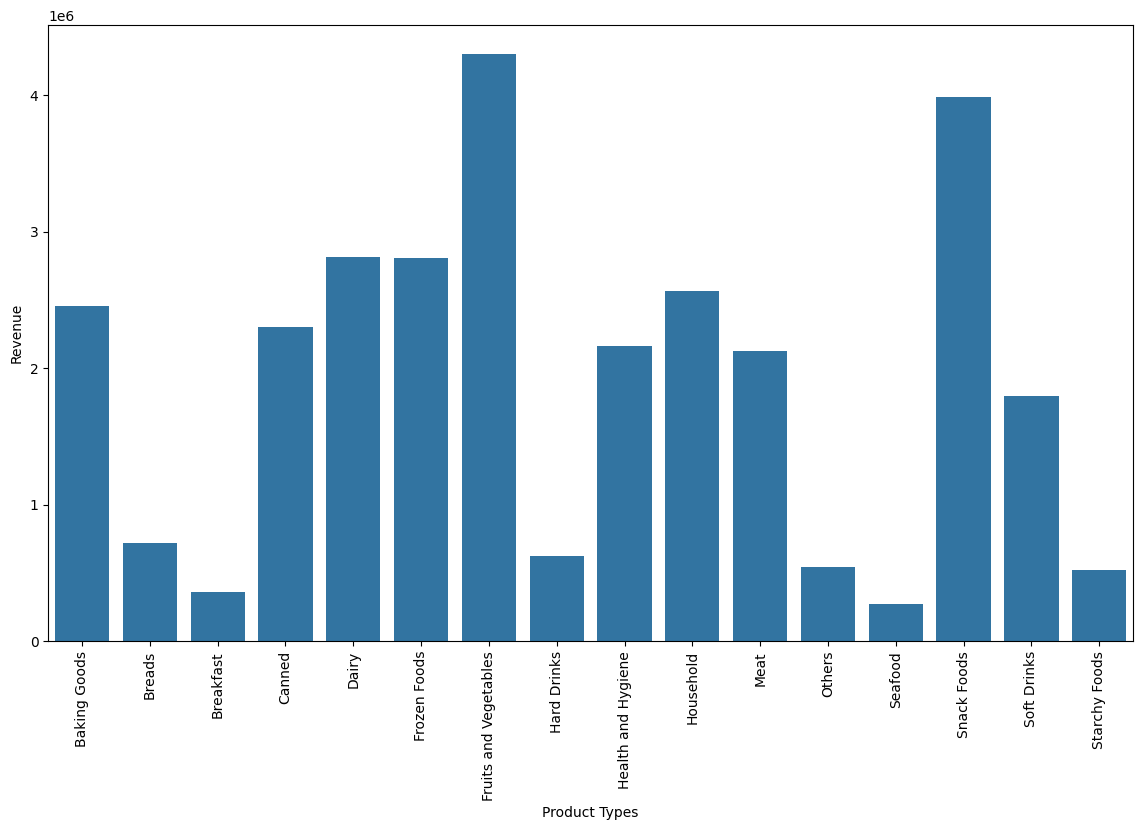

In [ ]:
df_revenue1 = data.groupby(["Product_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.Product_Type, y=df_revenue1.Product_Store_Sales_Total)
a.set_xlabel("Product Types")
a.set_ylabel("Revenue")
plt.show()

In [ ]:
df_revenue2 = data.groupby(["Product_Sugar_Content"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()

In [ ]:
df_store_revenue = data.groupby(["Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()

In [ ]:
df_revenue3 = data.groupby(["Store_Size"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()

In [ ]:
df_revenue4 = data.groupby(["Store_Location_City_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()

In [ ]:
df_revenue5 = data.groupby(["Store_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()

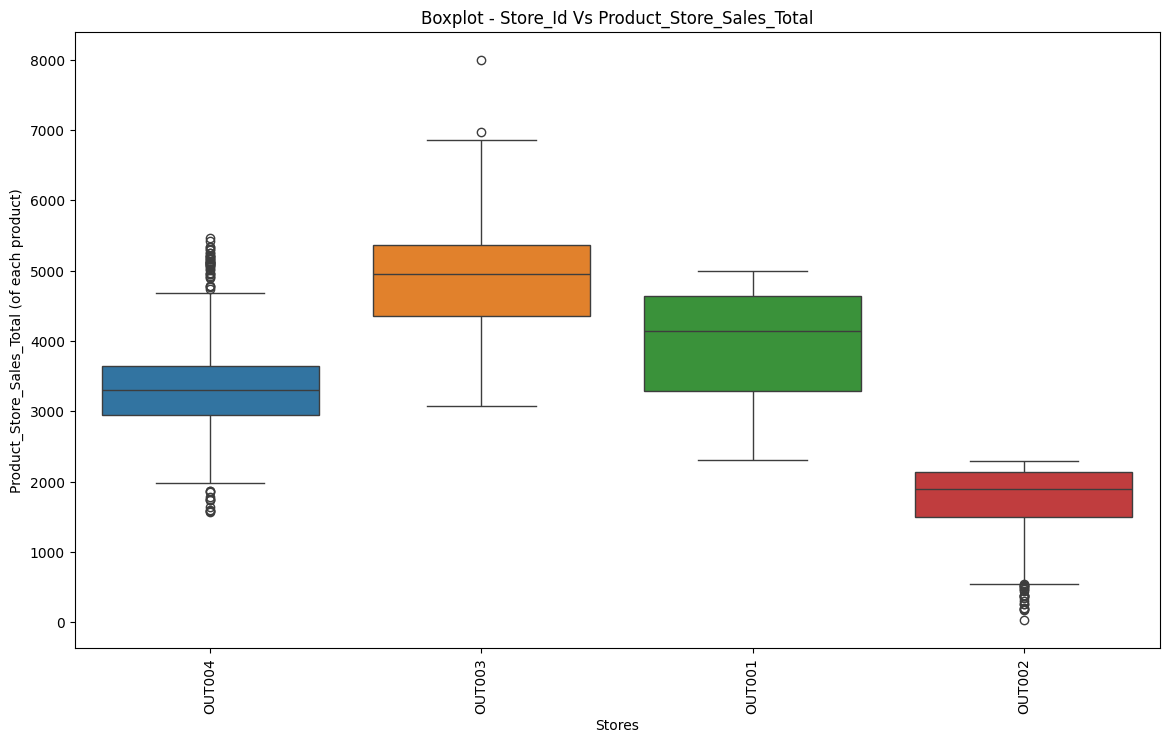

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data=data, x="Store_Id", y="Product_Store_Sales_Total", hue = "Store_Id")
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

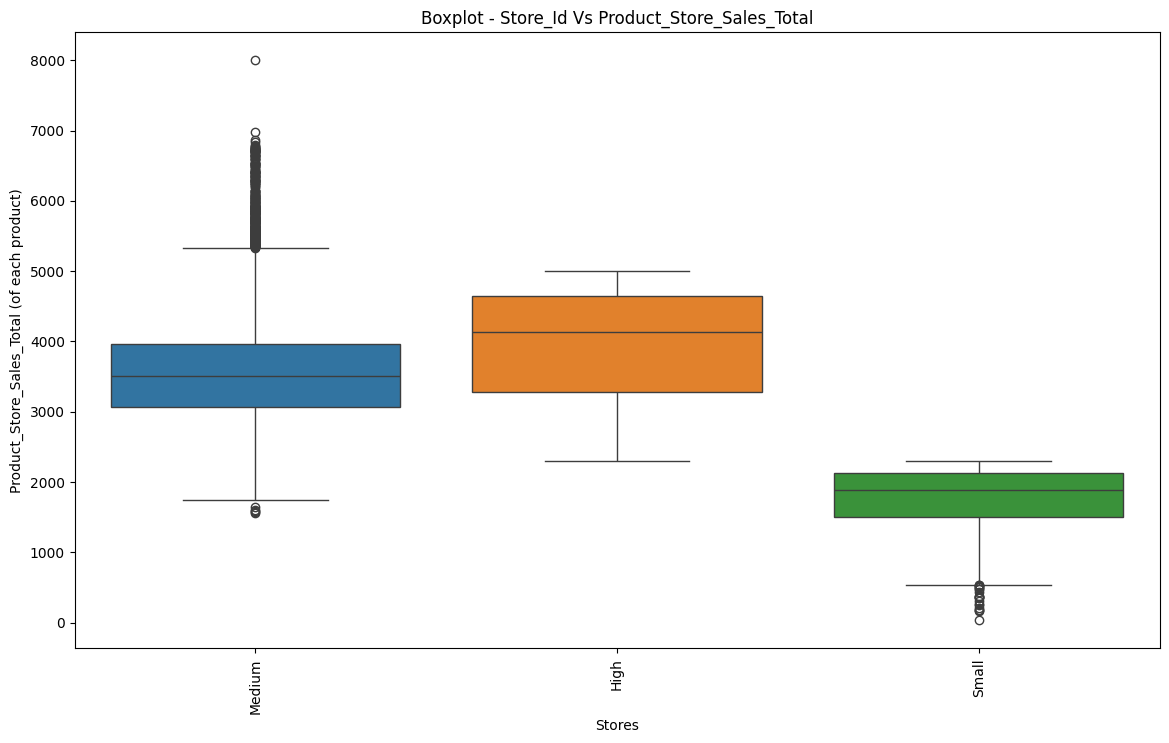

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data=data, x="Store_Size", y="Product_Store_Sales_Total", hue = "Store_Size")
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

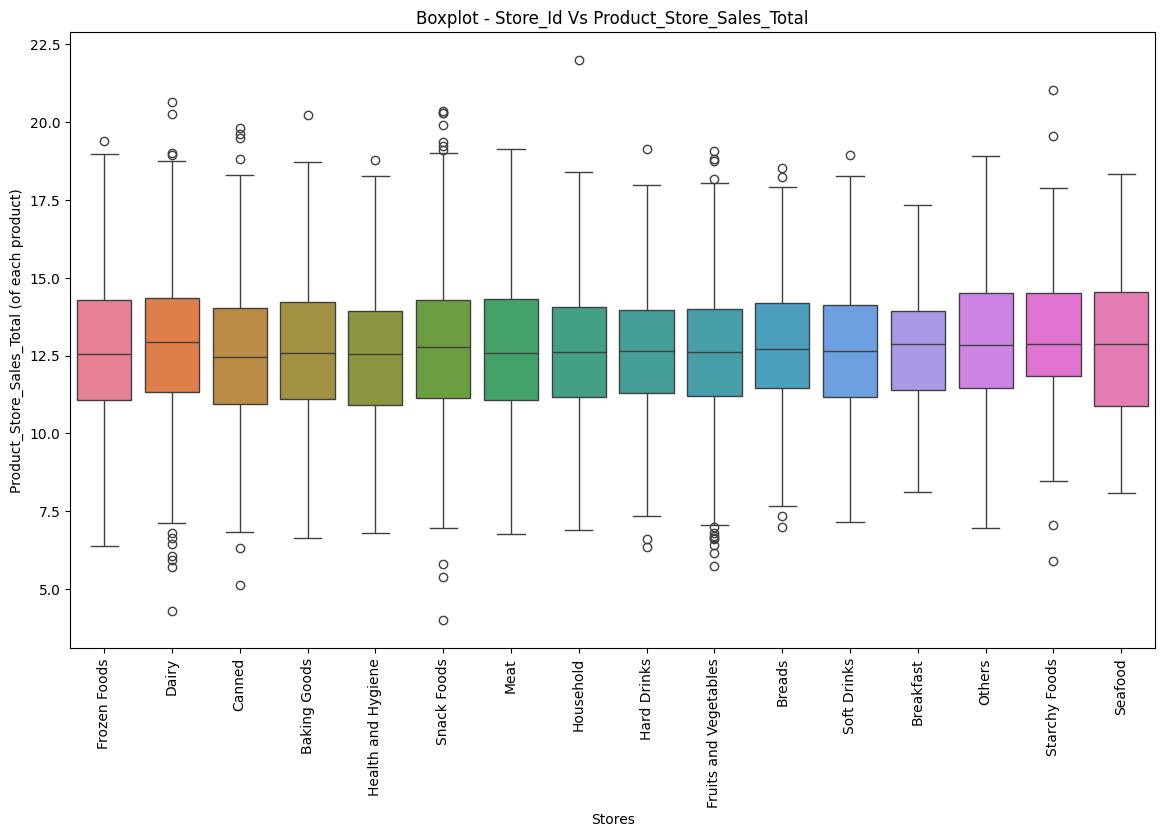

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data=data, x="Product_Type", y="Product_Weight", hue = "Product_Type")
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

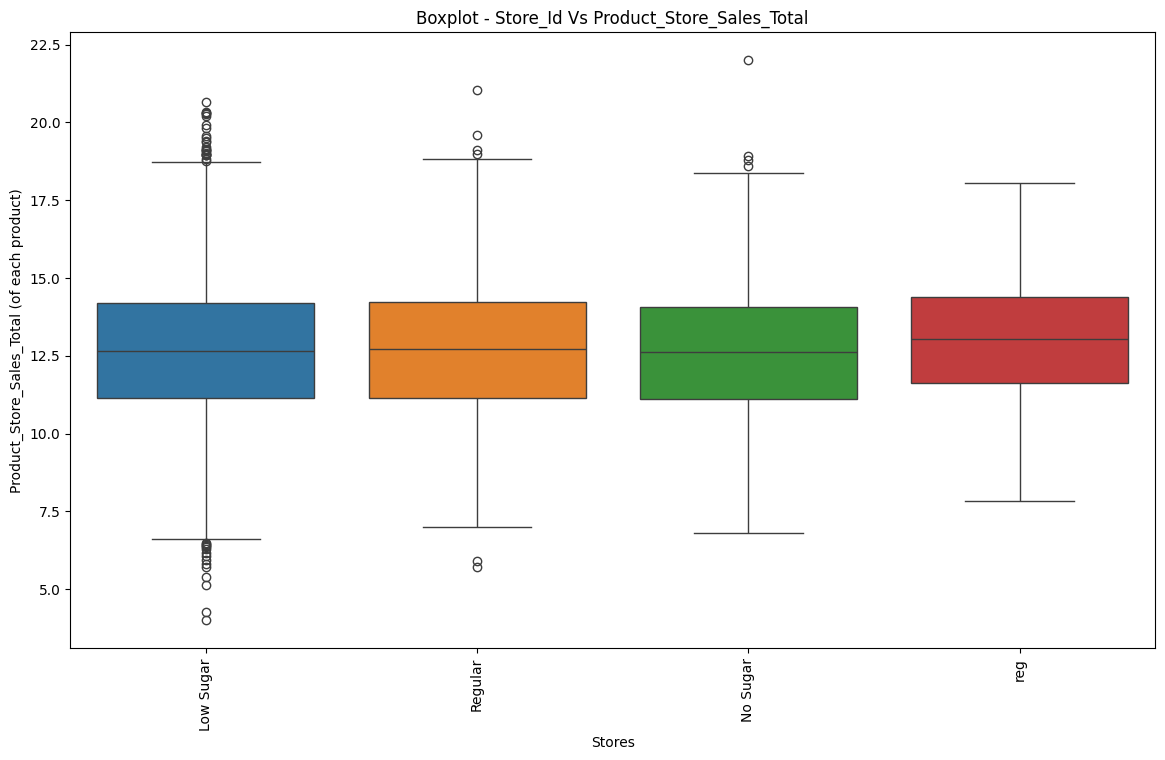

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data=data, x="Product_Sugar_Content", y="Product_Weight", hue = "Product_Sugar_Content")
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

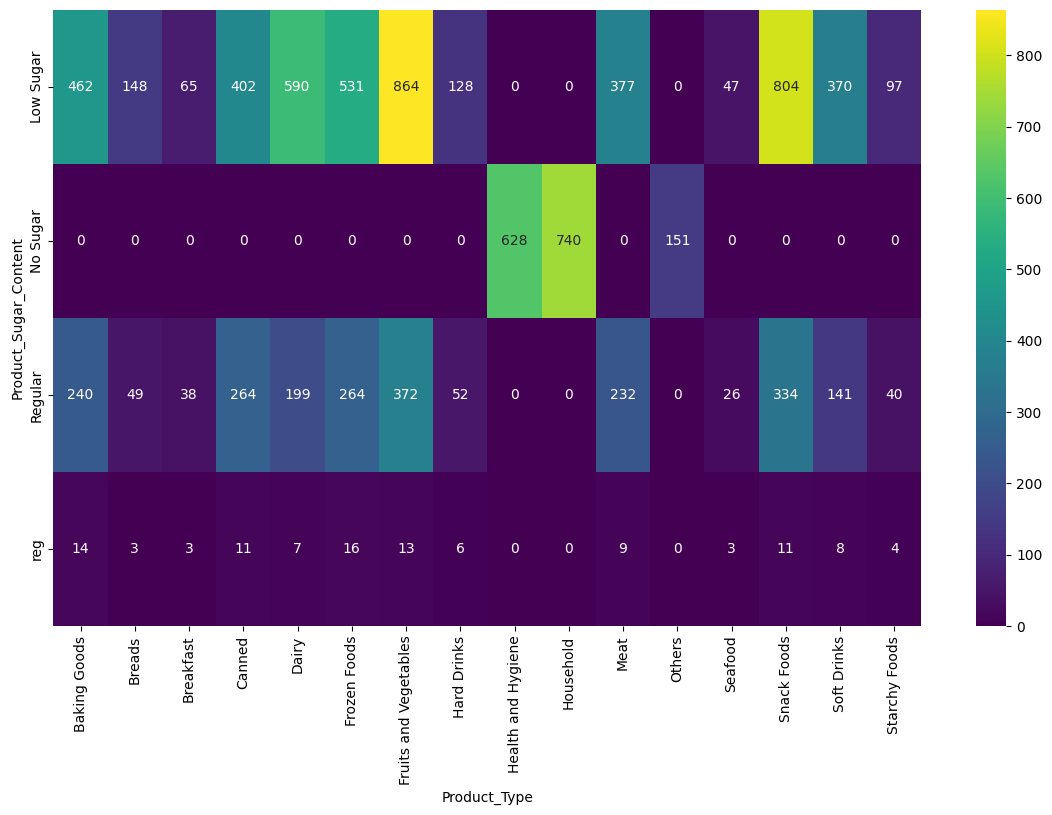

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    pd.crosstab(data["Product_Sugar_Content"], data["Product_Type"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("Product_Sugar_Content")
plt.xlabel("Product_Type")
plt.show()

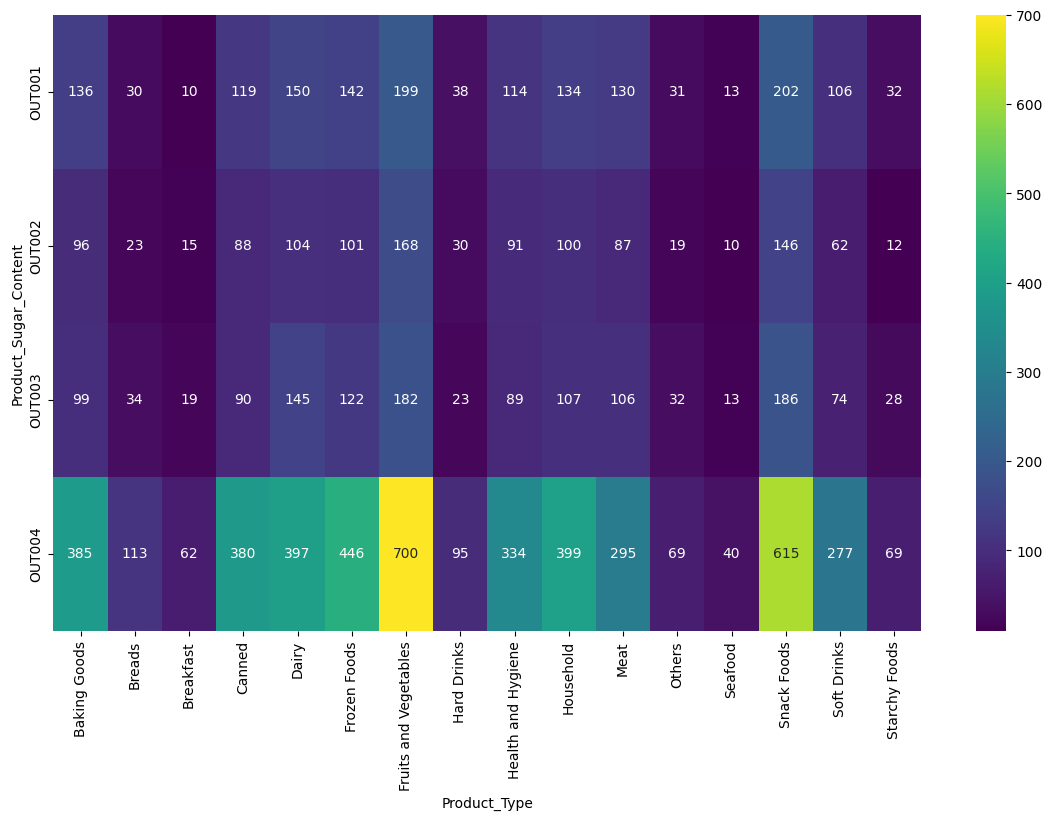

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    pd.crosstab(data["Store_Id"], data["Product_Type"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("Product_Sugar_Content")
plt.xlabel("Product_Type")
plt.show()

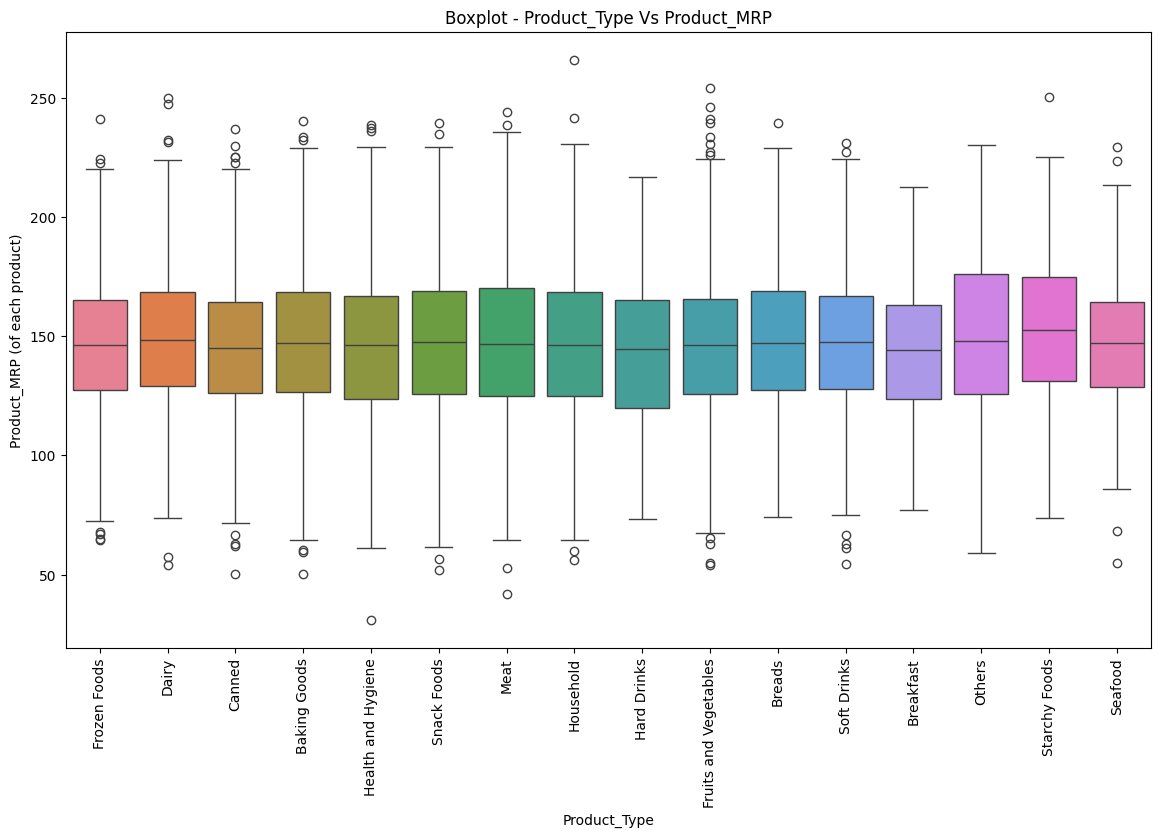

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data = data, x = "Product_Type", y = "Product_MRP", hue = "Product_Type")
plt.xticks(rotation=90)
plt.title("Boxplot - Product_Type Vs Product_MRP")
plt.xlabel("Product_Type")
plt.ylabel("Product_MRP (of each product)")
plt.show()

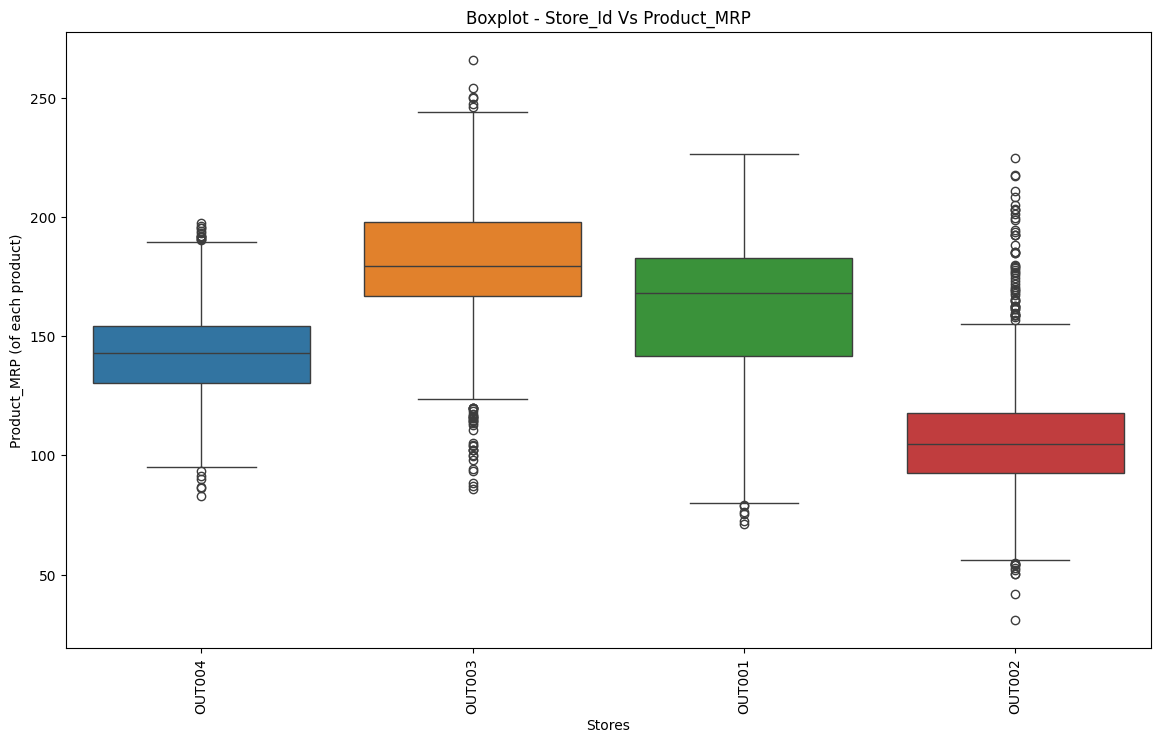

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data = data, x = "Store_Id", y = "Product_MRP", hue = "Store_Id") #Complete the code to plot the boxplot with x as Store_Id , y as Product_MRP and hue as Store_Id
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Id Vs Product_MRP")
plt.xlabel("Stores")
plt.ylabel("Product_MRP (of each product)")
plt.show()

In [ ]:
data.loc[data["Store_Id"] == "OUT001"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,1586,1586,NC7187,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,1586.0,NaN,NaN,NaN,13.458865,2.064975,6.16,12.0525,13.96,14.95,17.97
Product_Sugar_Content,1586,4,Low Sugar,845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1586.0,NaN,NaN,NaN,0.068768,0.047131,0.004,0.033,0.0565,0.094,0.295
Product_Type,1586,16,Snack Foods,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1586.0,NaN,NaN,NaN,160.514054,30.359059,71.35,141.72,168.32,182.9375,226.59
Store_Id,1586,1,OUT001,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1586.0,NaN,NaN,NaN,1987.0,0.0,1987.0,1987.0,1987.0,1987.0,1987.0
Store_Size,1586,1,High,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1586,1,Tier 2,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.loc[data["Store_Id"] == "OUT001", "Product_Store_Sales_Total"].sum()

np.float64(6223113.18)

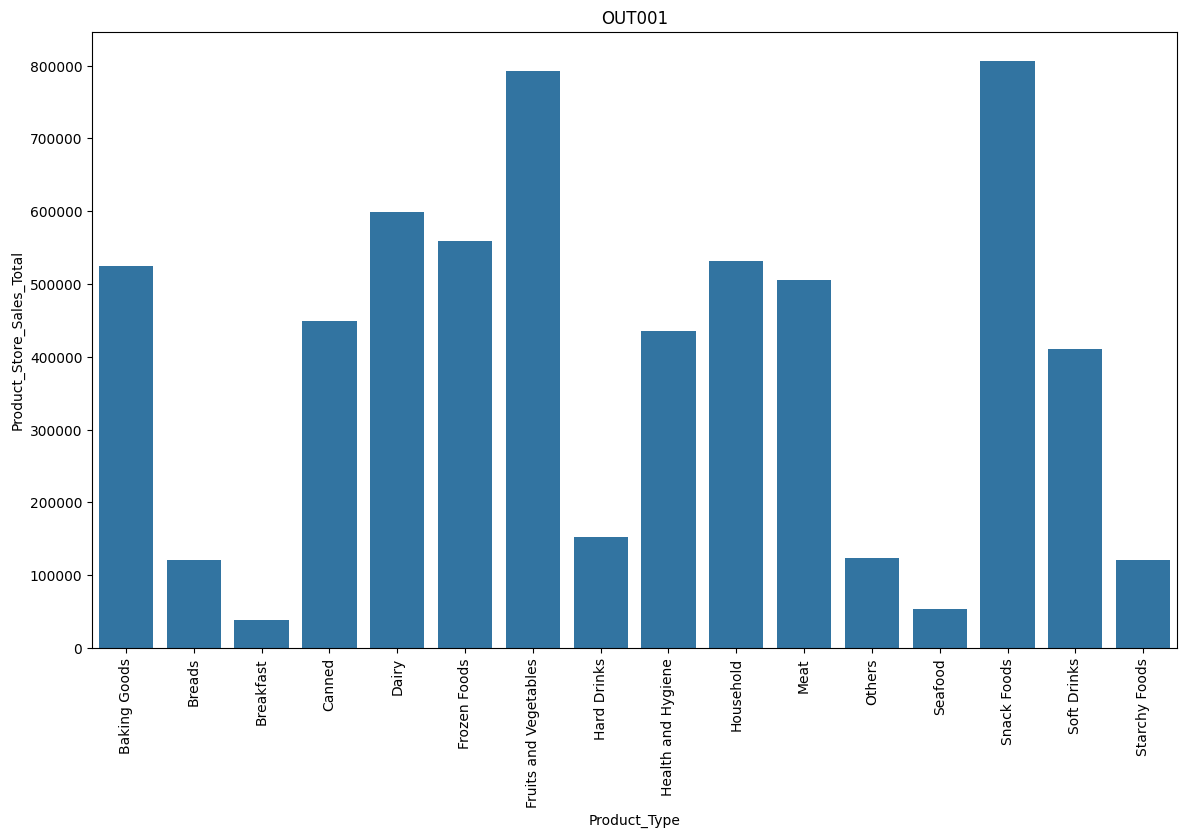

In [ ]:
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT001"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT001")
sns.barplot(x=df_OUT001.Product_Type, y=df_OUT001.Product_Store_Sales_Total)
plt.show()

In [ ]:
data.loc[data["Store_Id"] == "OUT002"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,1152,1152,NC2769,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,1152.0,NaN,NaN,NaN,9.911241,1.799846,4.0,8.7675,9.795,10.89,19.82
Product_Sugar_Content,1152,4,Low Sugar,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1152.0,NaN,NaN,NaN,0.067747,0.047567,0.006,0.031,0.0545,0.09525,0.292
Product_Type,1152,16,Fruits and Vegetables,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1152.0,NaN,NaN,NaN,107.080634,24.912333,31.0,92.8275,104.675,117.8175,224.93
Store_Id,1152,1,OUT002,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1152.0,NaN,NaN,NaN,1998.0,0.0,1998.0,1998.0,1998.0,1998.0,1998.0
Store_Size,1152,1,Small,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1152,1,Tier 3,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.loc[data["Store_Id"] == "OUT002", "Product_Store_Sales_Total"].sum()

np.float64(2030909.72)

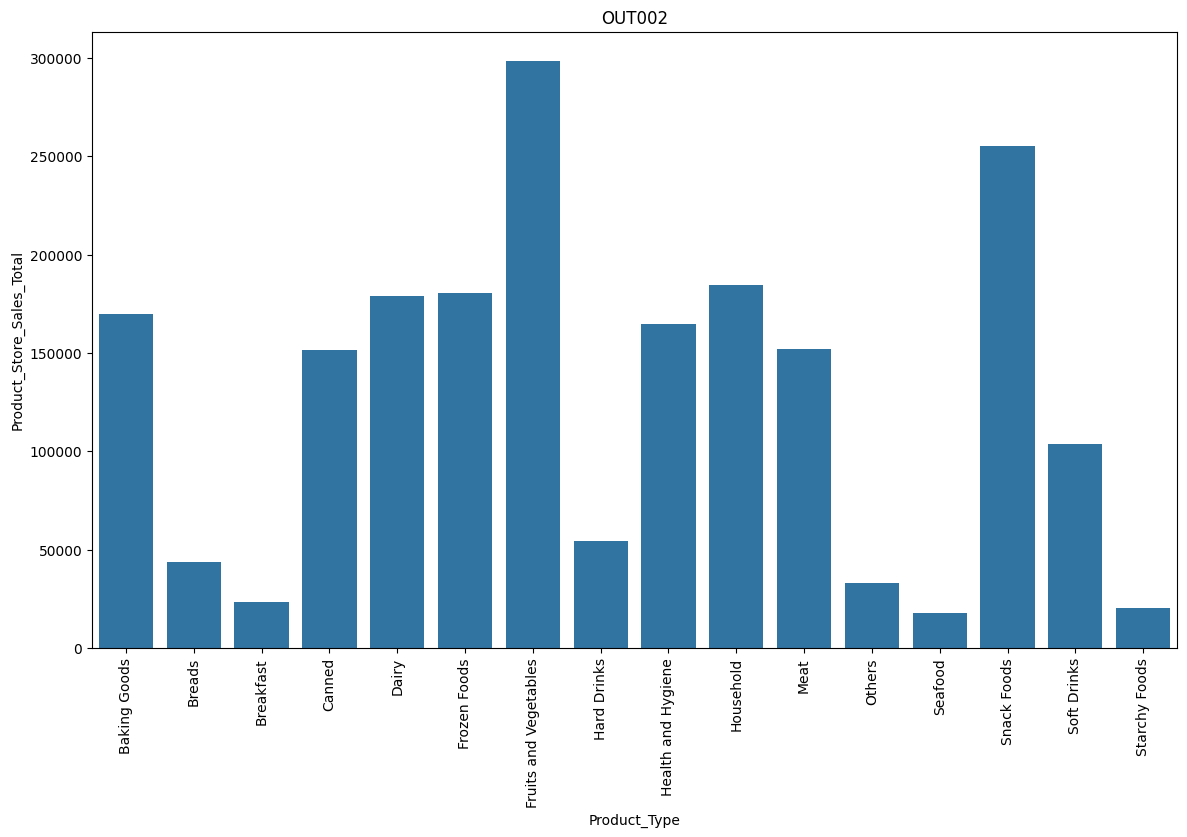

In [ ]:
df_OUT002 = (
    data.loc[data["Store_Id"] == "OUT002"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT002")
sns.barplot(x=df_OUT002.Product_Type, y=df_OUT002.Product_Store_Sales_Total)
plt.show()

In [ ]:
data.loc[data["Store_Id"] == "OUT003"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,1349,1349,NC522,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,1349.0,NaN,NaN,NaN,15.103692,1.893531,7.35,14.02,15.18,16.35,22.0
Product_Sugar_Content,1349,4,Low Sugar,750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1349.0,NaN,NaN,NaN,0.068637,0.048708,0.004,0.031,0.057,0.094,0.298
Product_Type,1349,16,Snack Foods,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1349.0,NaN,NaN,NaN,181.358725,24.796429,85.88,166.92,179.67,198.07,266.0
Store_Id,1349,1,OUT003,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1349.0,NaN,NaN,NaN,1999.0,0.0,1999.0,1999.0,1999.0,1999.0,1999.0
Store_Size,1349,1,Medium,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1349,1,Tier 1,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.loc[data["Store_Id"] == "OUT003", "Product_Store_Sales_Total"].sum()

np.float64(6673457.57)

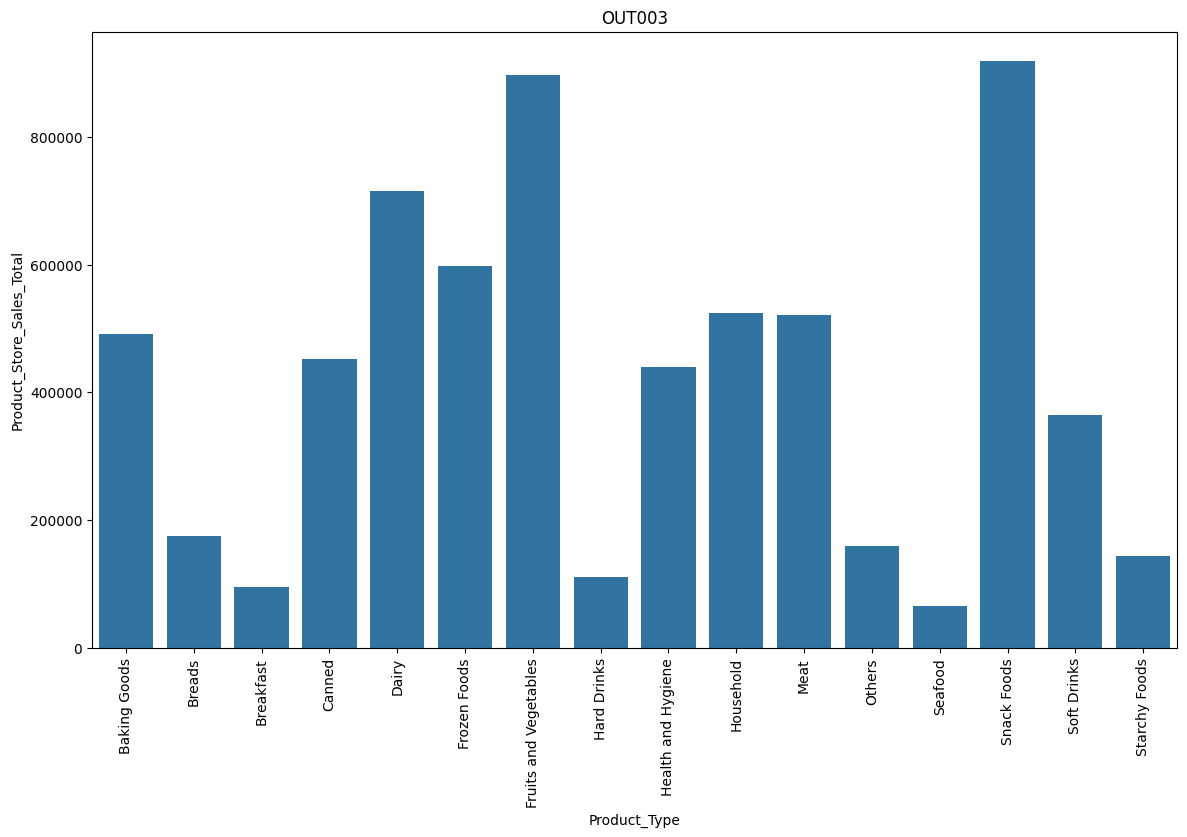

In [ ]:
df_OUT003 = (
    data.loc[data["Store_Id"] == "OUT003"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT003")
sns.barplot(x=df_OUT003.Product_Type, y=df_OUT003.Product_Store_Sales_Total)
plt.show()

In [ ]:
data.loc[data["Store_Id"] == "OUT004"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,4676,4676,NC584,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,4676.0,NaN,NaN,NaN,12.349613,1.428199,7.34,11.37,12.37,13.3025,17.79
Product_Sugar_Content,4676,4,Low Sugar,2632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,4676.0,NaN,NaN,NaN,0.069092,0.048584,0.004,0.031,0.056,0.097,0.297
Product_Type,4676,16,Fruits and Vegetables,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,4676.0,NaN,NaN,NaN,142.399709,17.513973,83.04,130.54,142.82,154.1925,197.66
Store_Id,4676,1,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,4676.0,NaN,NaN,NaN,2009.0,0.0,2009.0,2009.0,2009.0,2009.0,2009.0
Store_Size,4676,1,Medium,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,4676,1,Tier 2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.loc[data["Store_Id"] == "OUT004", "Product_Store_Sales_Total"].sum()

np.float64(15427583.43)

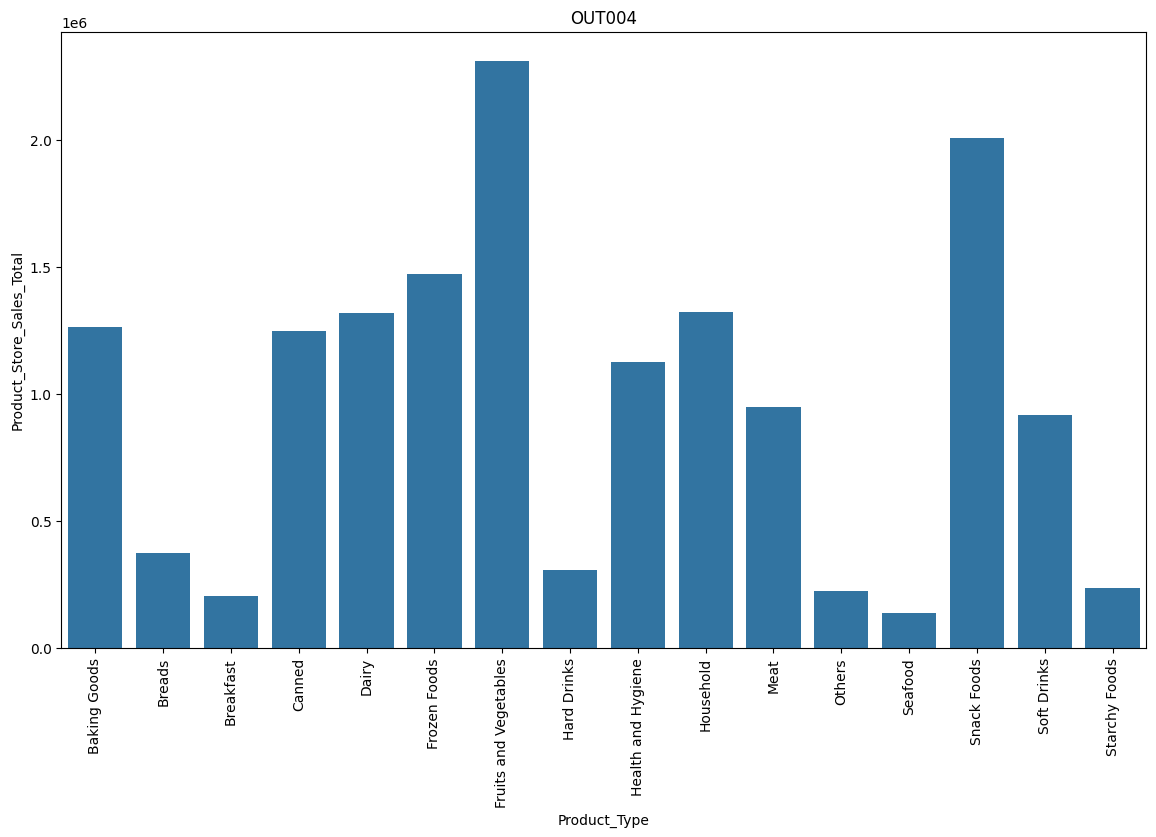

In [ ]:
df_OUT004 = (
    data.loc[data["Store_Id"] == "OUT004"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT004")
sns.barplot(x=df_OUT004.Product_Type, y=df_OUT004.Product_Store_Sales_Total)
plt.show()

In [ ]:
df1 = data.groupby(["Product_Type", "Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
df1

,Product_Type,Store_Id,Product_Store_Sales_Total
0,Baking Goods,OUT001,525131.04
1,Baking Goods,OUT002,169860.50
2,Baking Goods,OUT003,491908.20
3,Baking Goods,OUT004,1266086.26
4,Breads,OUT001,121274.09
5,Breads,OUT002,43419.47
6,Breads,OUT003,175391.93
7,Breads,OUT004,374856.75
8,Breakfast,OUT001,38161.10
9,Breakfast,OUT002,23396.10


In [ ]:
df2 = data.groupby(["Product_Sugar_Content", "Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
df2

,Product_Sugar_Content,Store_Id,Product_Store_Sales_Total
0,Low Sugar,OUT001,3300834.93
1,Low Sugar,OUT002,1156758.85
2,Low Sugar,OUT003,3706903.24
3,Low Sugar,OUT004,8658908.78
4,No Sugar,OUT001,1090353.78
5,No Sugar,OUT002,382162.19
6,No Sugar,OUT003,1123084.57
7,No Sugar,OUT004,2674343.14
8,Regular,OUT001,1749444.51
9,Regular,OUT002,472112.50


## EDA Insights
- The target variable, Product_Store_Sales_Total, is right-skewed, which shows that a small number of products contribute to a large portion of total sales
- Product_MRP shows a positive relationship with sales, meaning higher-priced products generally generate more revenue
- Store_Size and Store_Type have a noticeable impact on sales, with larger stores and supermarket-type stores performing better overall
- Some product categories consistently perform better across multiple stores, indicating strong category-level demand


# **Data Preprocessing**

In [ ]:
# Replacing reg with Regular
data.Product_Sugar_Content.replace(to_replace=["reg"], value=["Regular"], inplace=True)

In [ ]:
data.Product_Sugar_Content.value_counts()

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2359
No Sugar,1519


In [ ]:
## extracting the first two characters from the Product_Id column and storing it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


In [ ]:
data["Product_Id_char"].unique()

array(['FD', 'NC', 'DR'], dtype=object)

In [ ]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique()

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

In [ ]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique()

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

In [ ]:
data.loc[data.Product_Id_char == "DR+", "Product_Type"].unique()

array([], dtype=object)

In [ ]:
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique()

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

In [ ]:
# Outlet Age
data["Store_Age_Years"] = 2025 - data.Store_Establishment_Year

In [ ]:
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [ ]:
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"

In [ ]:
data['Product_Type_Category'] = data['Product_Type'].apply(change)

In [ ]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,16,Non Perishables
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,26,Perishables
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,38,Non Perishables
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,38,Non Perishables
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,27,Non Perishables


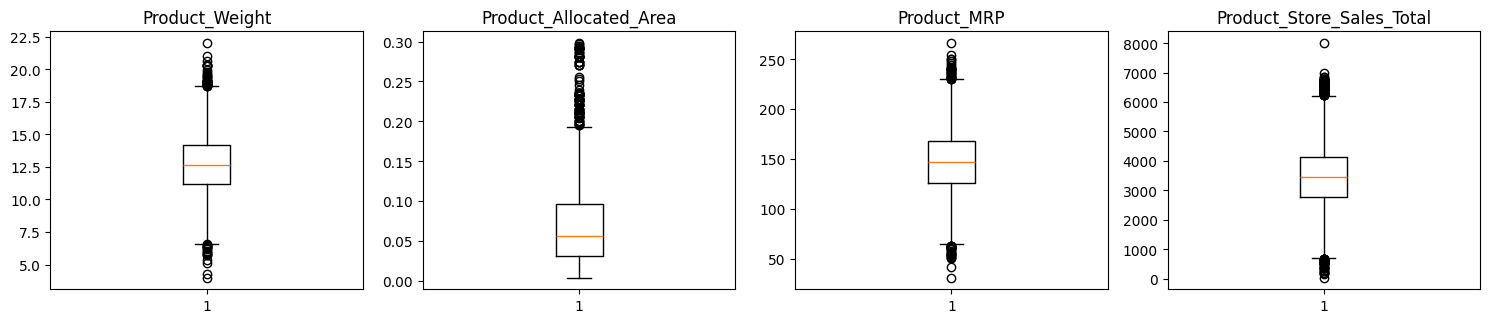

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Outlier Detection and Treatment
Outliers were identified using boxplots for numerical variables. No outlier treatment was applied because tree-based models like Decision Tree and Random Forest are not highly affected by extreme values and can handle non-linear data effectively.

In [ ]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,16,Non Perishables
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,26,Perishables
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,38,Non Perishables
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,38,Non Perishables
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,27,Non Perishables


In [ ]:
data = data.drop(
    ["Product_Id", "Product_Type", "Store_Id", "Store_Establishment_Year"],
    axis=1
)

In [ ]:
data.shape

(8763, 11)

In [ ]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_MRP,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,117.08,Medium,Tier 2,Supermarket Type2,2842.40,FD,16,Non Perishables
1,16.54,Low Sugar,0.144,171.43,Medium,Tier 1,Departmental Store,4830.02,FD,26,Perishables
2,14.28,Regular,0.031,162.08,High,Tier 2,Supermarket Type1,4130.16,FD,38,Non Perishables
3,12.10,Low Sugar,0.112,186.31,High,Tier 2,Supermarket Type1,4132.18,FD,38,Non Perishables
4,9.57,No Sugar,0.010,123.67,Small,Tier 3,Food Mart,2279.36,NC,27,Non Perishables


In [ ]:
# Separating features and the target column
X = data.drop("Product_Store_Sales_Total", axis=1)
y = data["Product_Store_Sales_Total"]

In [ ]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, shuffle=True
)

In [ ]:
X_train.shape, X_test.shape

((6134, 10), (2629, 10))

In [ ]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

['Product_Sugar_Content',
 'Store_Size',
 'Store_Location_City_Type',
 'Store_Type',
 'Product_Id_char',
 'Product_Type_Category']

In [ ]:
# Create a preprocessing pipeline for the categorical features
preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
)

# **Model Building**

## Define functions for Model Evaluation

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

## Evaluation Metric Selection

RMSE was chosen as the primary evaluation metric because it penalizes larger errors more heavily and is measured in the same units as the target variable. R-squared and Adjusted R-squared were also used to understand how well the models explain variance in the data, while MAE and MAPE help interpret average prediction errors.

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

In [ ]:
dtree = DecisionTreeRegressor(random_state=1)
dtree = make_pipeline(preprocessor,dtree)
dtree.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Category'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=1))])

In [ ]:
dtree_model_train_perf = model_performance_regression(dtree, X_train, y_train)
dtree_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,596.978222,468.965498,0.685033,0.684519,0.16569


In [ ]:
dtree_model_test_perf = model_performance_regression(dtree, X_test, y_test)
dtree_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,615.933034,485.429583,0.668482,0.667215,0.187421


In [ ]:
rf_estimator = RandomForestRegressor(random_state=1)
rf_estimator = make_pipeline(preprocessor,rf_estimator)
rf_estimator.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Category'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=1))])

In [ ]:
rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,596.994959,468.87585,0.685016,0.684501,0.165674


In [ ]:
rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,615.906846,485.311027,0.66851,0.667244,0.187394


## Model Performance Comparison Before Tuning

Before hyperparameter tuning, the Random Forest model performed better than the Decision Tree model on both the training and test datasets. This is expected since Random Forest combines multiple trees, which helps reduce overfitting compared to a single Decision Tree.

# **Model Performance Improvement - Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier.
dtree_tuned = DecisionTreeRegressor(random_state=1)
dtree_tuned = make_pipeline(preprocessor,dtree_tuned)

# Grid of parameters to choose from
parameters = {
    "decisiontreeregressor__max_depth": list(np.arange(2, 6)),
    "decisiontreeregressor__min_samples_leaf": [1, 3, 5],
    "decisiontreeregressor__max_leaf_nodes": [2, 3, 5, 10, 15],
    "decisiontreeregressor__min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=r2_score, cv=3, n_jobs =-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Category'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=np.int64(2), max_leaf_nodes=2,
                                       min_impurity_decrease=0.001,
                                       random_state=1))])

In [ ]:
dtree_tuned_model_train_perf = model_performance_regression(dtree_tuned, X_train, y_train)
dtree_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,830.838204,656.388225,0.389929,0.388932,0.214436


In [ ]:
dtree_tuned_model_test_perf = model_performance_regression(dtree_tuned, X_test, y_test)
dtree_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,845.130586,668.489477,0.375851,0.373467,0.234787


In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestRegressor(random_state=1)
rf_tuned = make_pipeline(preprocessor,rf_tuned)

# Grid of parameters to choose from
parameters = {
    "randomforestregressor__max_depth": [None, 5, 10, 20],
    "randomforestregressor__max_features": ["sqrt", "log2"],
    "randomforestregressor__n_estimators": [100, 200, 300],
}

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=r2_score, cv=3, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Category'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', random_state=1))])

In [ ]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,596.994959,468.87585,0.685016,0.684501,0.165674


In [ ]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,615.906846,485.311027,0.66851,0.667244,0.187394


## Model Performance After Tuning

After tuning, both models showed improved performance. The tuned Random Forest model achieved better results on the test set with a higher R-squared value and lower error compared to the untuned version. This indicates that hyperparameter tuning helped improve model generalization.

# **Model Performance Comparison, Final Model Selection, and Serialization**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree (Tuned)",
    "Random Forest",
    "Random Forest (Tuned)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree (Tuned),Random Forest,Random Forest (Tuned)
RMSE,596.978222,830.838204,596.994959,596.994959
MAE,468.965498,656.388225,468.875850,468.875850
R-squared,0.685033,0.389929,0.685016,0.685016
Adj. R-squared,0.684519,0.388932,0.684501,0.684501
MAPE,0.165690,0.214436,0.165674,0.165674


In [ ]:
# training performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        dtree_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree (Tuned)",
    "Random Forest",
    "Random Forest (Tuned)",
]

print("Testing performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree,Decision Tree (Tuned),Random Forest,Random Forest (Tuned)
RMSE,615.933034,845.130586,615.906846,615.906846
MAE,485.429583,668.489477,485.311027,485.311027
R-squared,0.668482,0.375851,0.668510,0.668510
Adj. R-squared,0.667215,0.373467,0.667244,0.667244
MAPE,0.187421,0.234787,0.187394,0.187394


## Final Model Selection

The tuned Random Forest model was selected as the final model because it provided the best overall performance on the test data. It showed lower prediction error and better generalization compared to the other models, making it the most reliable choice.

In [ ]:
# Create a folder for storing the files needed for web app deployment
os.makedirs("backend_files", exist_ok=True)

In [ ]:
saved_model_path = "backend_files/rf_tuned_model.joblib"

In [ ]:
joblib.dump(rf_tuned, saved_model_path)

['backend_files/rf_tuned_model.joblib']

In [ ]:
saved_model = joblib.load("backend_files/rf_tuned_model.joblib")

In [ ]:
saved_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Category'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', random_state=1))])

In [ ]:
saved_model.predict(X_test)

array([3301.4740379 , 4861.77518803, 4858.00647634, ..., 3318.25341745,
       3301.4740379 , 3301.4740379 ])

# **Deployment - Backend**

## Flask Web Framework


In [ ]:
%%writefile backend_files/app.py

# Import necessary libraries
import numpy as np
import joblib  # For loading the serialized model
import pandas as pd  # For data manipulation
from flask import Flask, request, jsonify  # For creating the Flask API

# Initialize Flask app with a name
superkart_api = Flask("superkart_api") #Complete the code to define the name of the app

# Load the trained churn prediction model
model = joblib.load("rf_tuned_model.joblib") #Complete the code to define the location of the serialized model

# Define a route for the home page
@superkart_api.get('/')
def home():
    return "Welcome to the SuperKart Sales Prediction API" #Complete the code to define a welcome message

# Define an endpoint to predict churn for a single customer
@superkart_api.post('/v1/predict')
def predict_sales():
    # Get JSON data from the request
    data = request.get_json()

    # Extract relevant customer features from the input data. The order of the column names matters.
    sample = {
        'Product_Weight': data['Product_Weight'],
        'Product_Sugar_Content': data['Product_Sugar_Content'],
        'Product_Allocated_Area': data['Product_Allocated_Area'],
        'Product_MRP': data['Product_MRP'],
        'Store_Size': data['Store_Size'],
        'Store_Location_City_Type': data['Store_Location_City_Type'],
        'Store_Type': data['Store_Type'],
        'Product_Id_char': data['Product_Id_char'],
        'Store_Age_Years': data['Store_Age_Years'],
        'Product_Type_Category': data['Product_Type_Category']
    }

    # Convert the extracted data into a DataFrame
    input_data = pd.DataFrame([sample])

    # Make a churn prediction using the trained model
    prediction = model.predict(input_data).tolist()[0]

    # Return the prediction as a JSON response
    return jsonify({'Sales': prediction})


# Run the Flask app in debug mode
if __name__ == '__main__':
    superkart_api.run(debug=True)

Overwriting backend_files/app.py


## Dependencies File

In [ ]:
%%writefile backend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
seaborn==0.13.2
joblib==1.4.2
xgboost==2.1.4
joblib==1.4.2
Werkzeug==2.2.2
flask==2.2.2
gunicorn==20.1.0
requests==2.32.3
uvicorn[standard]
streamlit==1.43.2

Overwriting backend_files/requirements.txt


## Dockerfile

In [ ]:
%%writefile backend_files/Dockerfile
FROM python:3.9-slim

# Set the working directory inside the container
WORKDIR /app

# Copy all files from the current directory to the container's working directory
COPY . .

# Install dependencies from the requirements file without using cache to reduce image size
RUN pip install --no-cache-dir --upgrade -r requirements.txt

# Define the command to start the application using Gunicorn with 4 worker processes
# - `-w 4`: Uses 4 worker processes for handling requests
# - `-b 0.0.0.0:7860`: Binds the server to port 7860 on all network interfaces
# - `app:superkart_api`: Runs the Flask app (app.py contains superkart_api)
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:7860", "app:superkart_api"]

Overwriting backend_files/Dockerfile


## Setting up a Hugging Face Docker Space for the Backend

In [ ]:
# Import the login function from the huggingface_hub library
from huggingface_hub import login

# Login to your Hugging Face account using your access token
# Replace "YOUR_HUGGINGFACE_TOKEN" with your actual token
#login(token="YOUR_HUGGINGFACE_TOKEN")  # You can get your token from https://huggingface.co/settings/tokens
login(token="YOUR_HUGGINGFACE_TOKEN")

# Import the create_repo function from the huggingface_hub library
from huggingface_hub import create_repo

## Uploading Files to Hugging Face Space (Docker Space)

In [ ]:
# Try to create the repository for the Hugging Face Space
try:
    create_repo("superkart-ml-app",
        repo_type="space",  # Specify the repository type as "space"
        space_sdk="docker",  # Specify the space SDK as "docker"
        private=False  # Set to True if you want the space to be private
    )
except Exception as e:
    # Handle potential errors during repository creation
    if "RepositoryAlreadyExistsError" in str(e):
        print("Repository already exists. Skipping creation.")
    else:
        print(f"Error creating repository: {e}")

Error creating repository: Client error '409 Conflict' for url 'https://huggingface.co/api/repos/create' (Request ID: Root=1-698e6832-4adc94ab34f3fcdd39e7b669;e49d123c-3e12-4c89-b0e2-5a36c02f4ee8)
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/409

You already created this space repo: jimlybora/superkart-ml-app


In [ ]:
# for hugging face space authentication to upload files

access_key = "YOUR_HUGGINGFACE_TOKEN"  #Complete the code to define the access token
repo_id = "jimlybora/superkart-ml-app"  #Complete the code to define the repo id.

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="backend_files",
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...les/rf_tuned_model.joblib: 100%|##########|  430kB /  430kB            

CommitInfo(commit_url='https://huggingface.co/spaces/jimlybora/superkart-ml-app/commit/bbf37d26766286898f2721a4285ae19de0dcbb67', commit_message='Upload folder using huggingface_hub', commit_description='', oid='bbf37d26766286898f2721a4285ae19de0dcbb67', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/jimlybora/superkart-ml-app', endpoint='https://huggingface.co', repo_type='space', repo_id='jimlybora/superkart-ml-app'), pr_revision=None, pr_num=None)

# **Deployment - Frontend**

## Points to note before executing the below cells
- Create a Streamlit space on Hugging Face by following the instructions provided on the content page titled **`Creating Spaces and Adding Secrets in Hugging Face`** from Week 1

## Streamlit for Interactive UI

In [ ]:
# Create a folder for storing the files needed for frontend UI deployment
os.makedirs("frontend_files", exist_ok=True)

In [ ]:
%%writefile frontend_files/app.py

import streamlit as st
import requests

st.title("SuperKart Sales Prediction App")

# Input fields for product and store data
Product_Weight = st.number_input("Product Weight", min_value=0.0, value=12.66)
Product_Sugar_Content = st.selectbox("Product Sugar Content", ["Low Sugar", "Regular", "No Sugar"])
Product_Allocated_Area = st.number_input("Product Allocated Area", min_value=0.0, value=15.0)
Product_MRP = st.number_input("Product MRP", min_value=0.0, value=249.0)
Store_Size = st.selectbox("Store Size", ["Small", "Medium", "High"])
Store_Location_City_Type = st.selectbox("Store Location City Type", ["Tier 1", "Tier 2", "Tier 3"])
Store_Type = st.selectbox("Store Type", ["Grocery Store", "Supermarket Type1", "Supermarket Type2", "Supermarket Type3"])
Product_Id_char = st.selectbox("Product ID Category", ["FD", "DR", "NC"])
Store_Age_Years = st.number_input("Store Age (Years)", min_value=0, value=10)
Product_Type_Category = st.selectbox(
    "Product Type Category",
    ["Fruits and Vegetables", "Snack Foods", "Household", "Frozen Foods", "Dairy", "Canned", "Baking Goods", "Health and Hygiene", "Meat", "Soft Drinks", "Breads", "Breakfast"]
)

product_data = {
    "Product_Weight": Product_Weight,
    "Product_Sugar_Content": Product_Sugar_Content,
    "Product_Allocated_Area": Product_Allocated_Area,
    "Product_MRP": Product_MRP,
    "Store_Size": Store_Size,
    "Store_Location_City_Type": Store_Location_City_Type,
    "Store_Type": Store_Type,
    "Product_Id_char": Product_Id_char,
    "Store_Age_Years": Store_Age_Years,
    "Product_Type_Category": Product_Type_Category
}

if st.button("Predict", type='primary'):
    response = requests.post(
        "https://jimlybora-superkart-ml-app.hf.space/v1/predict",
        json=product_data
    )
    if response.status_code == 200:
        result = response.json()
        predicted_sales = result["Sales"]
        st.write(f"Predicted Product Store Sales Total: ₹{predicted_sales:.2f}")
    else:
        st.error("Error in API request")

Overwriting frontend_files/app.py


## Dependencies File

In [ ]:
%%writefile frontend_files/requirements.txt
requests==2.32.3
streamlit==1.45.0

Overwriting frontend_files/requirements.txt


## DockerFile

In [ ]:
%%writefile frontend_files/Dockerfile
# Use a minimal base image with Python 3.9 installed
FROM python:3.9-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Overwriting frontend_files/Dockerfile


## Uploading Files to Hugging Face Space (Streamlit Space)

In [ ]:
access_key = "YOUR_HUGGINGFACE_TOKEN"
repo_id = "jimlybora/superkart-frontend"

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="frontend_files",
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/jimlybora/superkart-frontend/commit/c2f8db454ac75dd504b9b7b5531d780ff521ea2b', commit_message='Upload folder using huggingface_hub', commit_description='', oid='c2f8db454ac75dd504b9b7b5531d780ff521ea2b', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/jimlybora/superkart-frontend', endpoint='https://huggingface.co', repo_type='space', repo_id='jimlybora/superkart-frontend'), pr_revision=None, pr_num=None)

## Deployed Applications
Backend API Space: https://jimlybora-superkart-ml-app.hf.space  
Frontend Streamlit App: https://jimlybora-superkart-frontend.hf.space

# **Actionable Insights and Business Recommendations**

### Insights
- Store size and store type are major drivers of sales performance
- Higher MRP products tend to generate higher revenue up to an optimal price range
- Perishable products show strong sales dependency on store characteristics
- Product display allocation influences overall revenue generation

### Recommendations
- Allocate more shelf space to high-performing product categories
- Focus expansion efforts on high-revenue store formats
- Use the deployed model for inventory planning and demand forecasting
- Optimize pricing strategies based on predicted sales trends

### Conclusion

This project successfully built and deployed a machine learning-based sales forecasting solution for SuperKart. Through detailed exploratory analysis, robust modeling, and end-to-end deployment, the solution provides actionable insights that can support strategic business decision-making.